In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coviddataset1/datasetCovid.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/kaggle/input/coviddataset1/datasetCovid.csv", index_col=0, encoding = "ISO-8859-1")
data.head() 
data.tail()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,
ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2697fdccbfeb7f7,19,positive,0,0,0,0.694287,0.541564,-0.906829,-0.325903,0.578024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 110, dtype: object
float64    70
object     36
int64       4
Name: count, dtype: int64


<Axes: ylabel='count'>

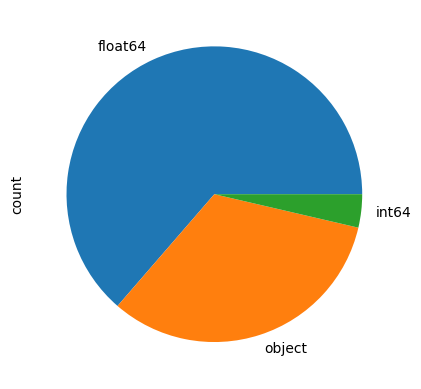

In [3]:
data.shape
#######################
print(data.dtypes)
print(data.dtypes.value_counts())
data.dtypes.value_counts().plot.pie()

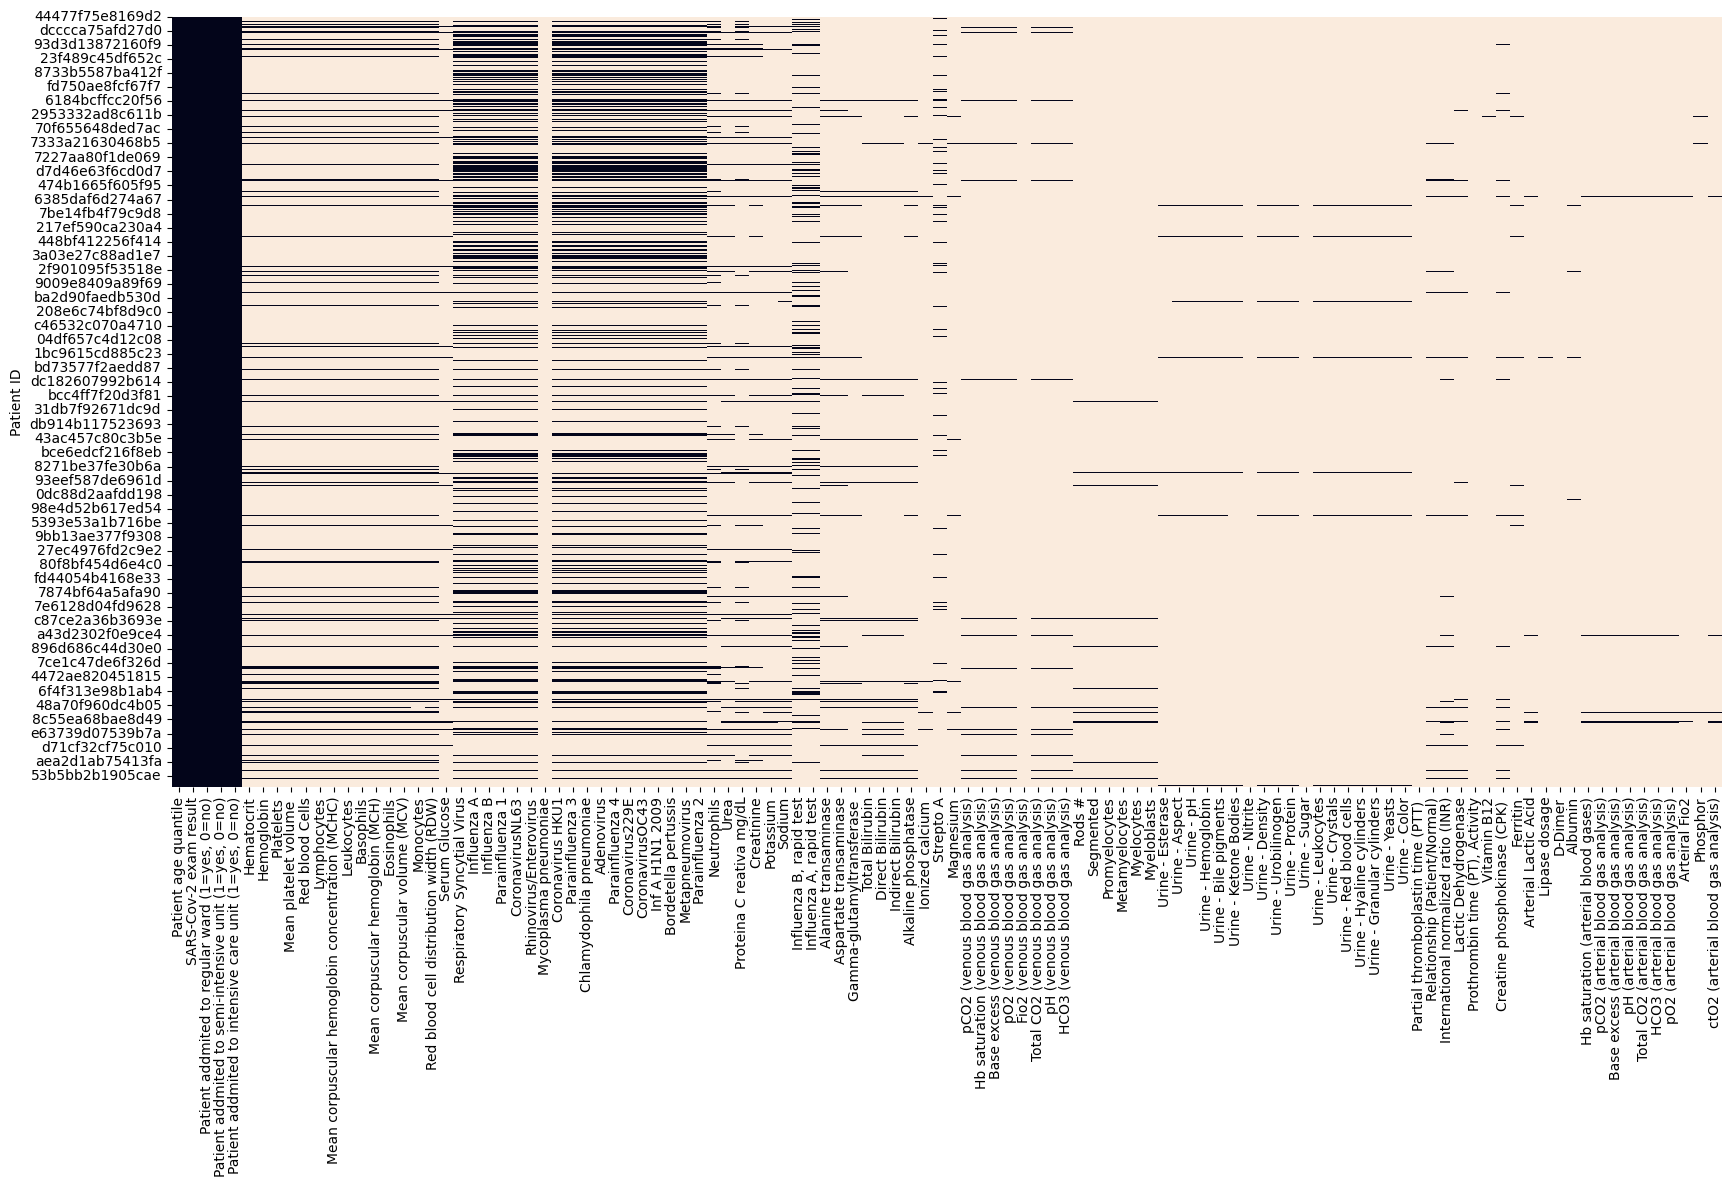

In [4]:
data.isna() 
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)
data.isna().sum()
(data.isna().sum()/data.shape[0]).sort_values(ascending=True)
missing_rate =data.isna().sum()/data.shape[0]

<Axes: ylabel='Patient ID'>

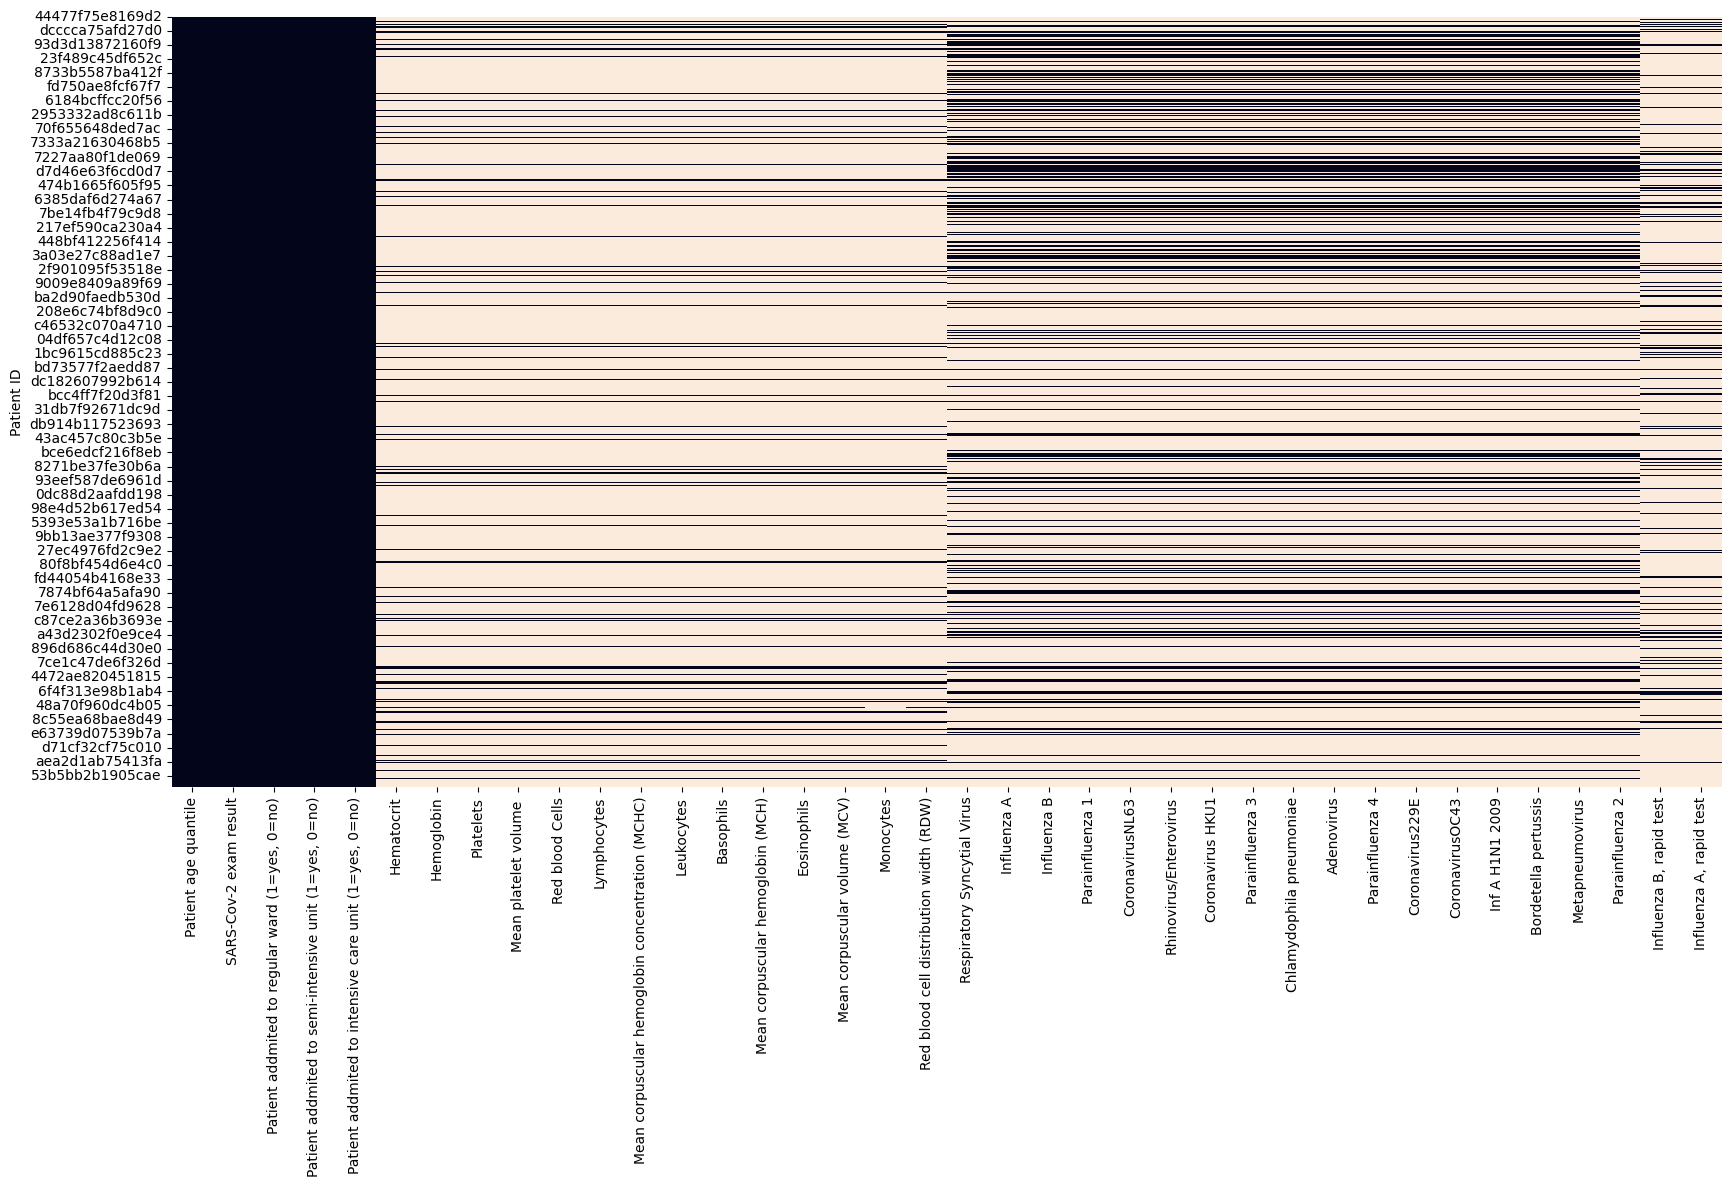

In [5]:
data.isna().sum()/data.shape[0]<0.9
data.columns[data.isna().sum()/data.shape[0]<0.9]
data[data.columns[data.isna().sum()/data.shape[0]<0.9]]
data=data[data.columns[data.isna().sum()/data.shape[0]<0.9]]
data.head()
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

Hematocrit
Hemoglobin


/tmp/ipykernel_19/2095915583.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_19/2095915583.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide 

Platelets
Mean platelet volume 


/tmp/ipykernel_19/2095915583.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_19/2095915583.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide 

Red blood Cells
Lymphocytes


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_19/2095915583.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_19/2095915583.p

Mean corpuscular hemoglobin concentration (MCHC)
Leukocytes


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_19/2095915583.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_19/2095915583.p

Basophils
Mean corpuscular hemoglobin (MCH)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_19/2095915583.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_19/2095915583.p

Eosinophils
Mean corpuscular volume (MCV)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_19/2095915583.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_19/2095915583.p

Monocytes
Red blood cell distribution width (RDW)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_19/2095915583.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Patient age quantile'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


----------------------------------------------------------
SARS-Cov-2 exam result ['negative' 'positive']
SARS-Cov-2 exam result
Respiratory Syncytial Virus [nan 'not_detected' 'detected']
Respiratory Syncytial Virus
Influenza A [nan 'not_detected' 'detected']
Influenza A
Influenza B [nan 'not_detected' 'detected']
Influenza B
Parainfluenza 1 [nan 'not_detected' 'detected']
Parainfluenza 1
CoronavirusNL63 [nan 'not_detected' 'detected']
CoronavirusNL63
Rhinovirus/Enterovirus [nan 'detected' 'not_detected']
Rhinovirus/Enterovirus
Coronavirus HKU1 [nan 'not_detected' 'detected']
Coronavirus HKU1
Parainfluenza 3 [nan 'not_detected' 'detected']
Parainfluenza 3
Chlamydophila pneumoniae [nan 'not_detected' 'detected']


/tmp/ipykernel_19/2095915583.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Chlamydophila pneumoniae
Adenovirus [nan 'not_detected' 'detected']
Adenovirus
Parainfluenza 4 [nan 'not_detected' 'detected']
Parainfluenza 4
Coronavirus229E [nan 'not_detected' 'detected']
Coronavirus229E
CoronavirusOC43 [nan 'not_detected' 'detected']
CoronavirusOC43
Inf A H1N1 2009 [nan 'not_detected' 'detected']
Inf A H1N1 2009
Bordetella pertussis [nan 'not_detected' 'detected']
Bordetella pertussis
Metapneumovirus [nan 'not_detected' 'detected']
Metapneumovirus
Parainfluenza 2 [nan 'not_detected']
Parainfluenza 2
Influenza B, rapid test [nan 'negative' 'positive']
Influenza B, rapid test
Influenza A, rapid test [nan 'negative' 'positive']
Influenza A, rapid test


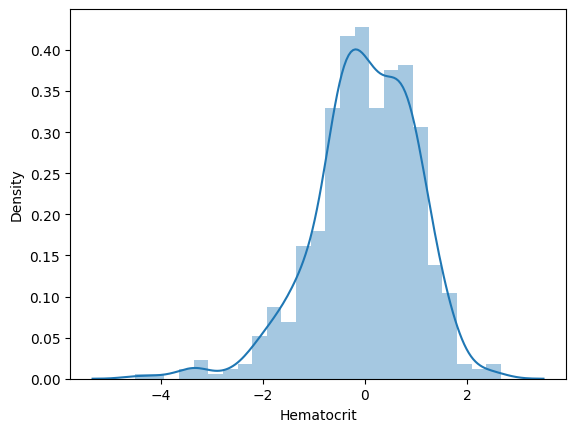

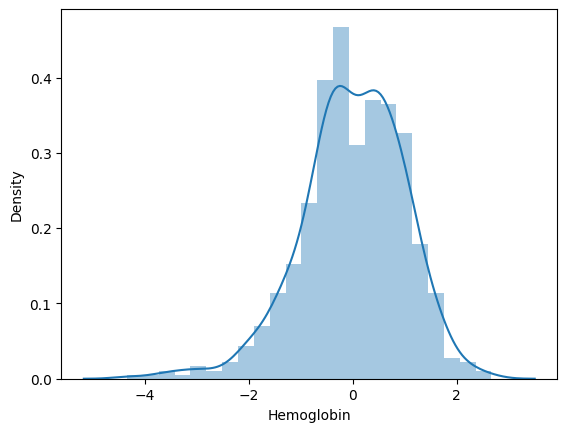

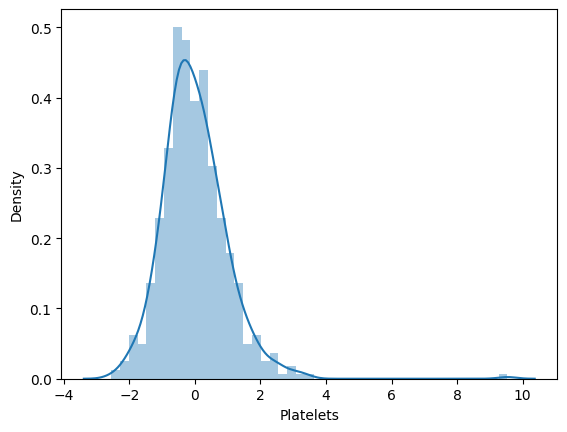

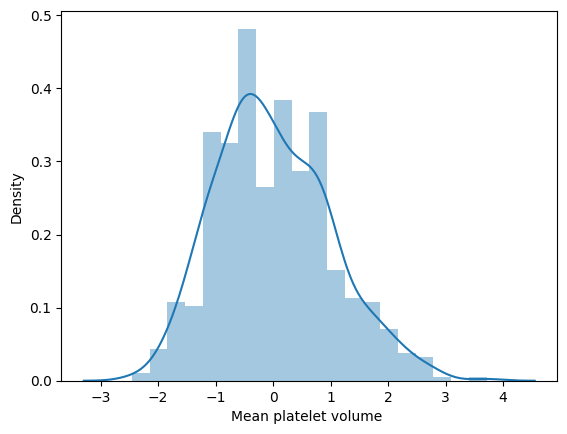

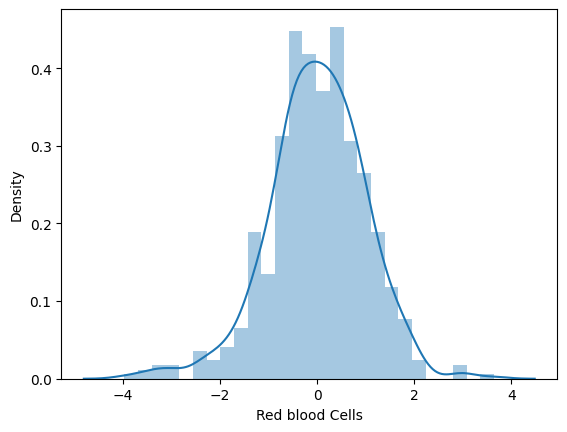

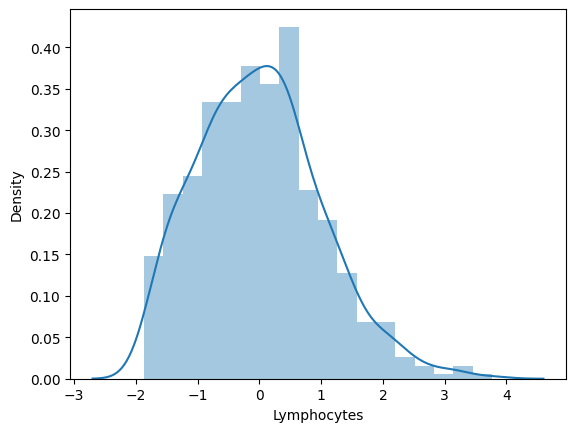

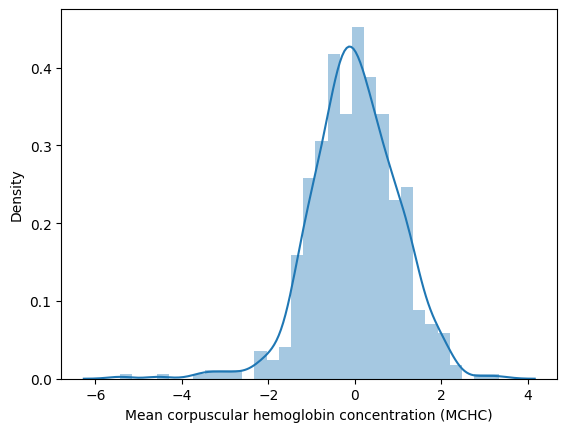

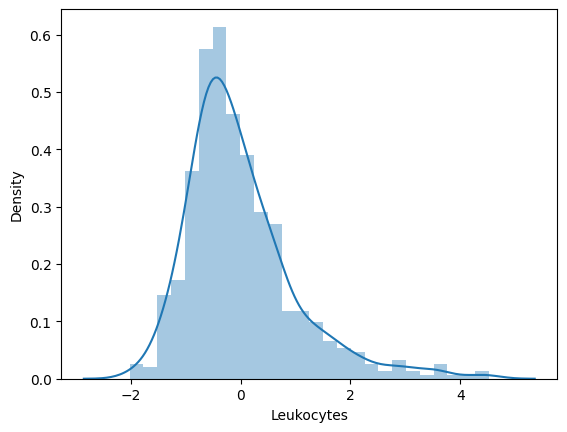

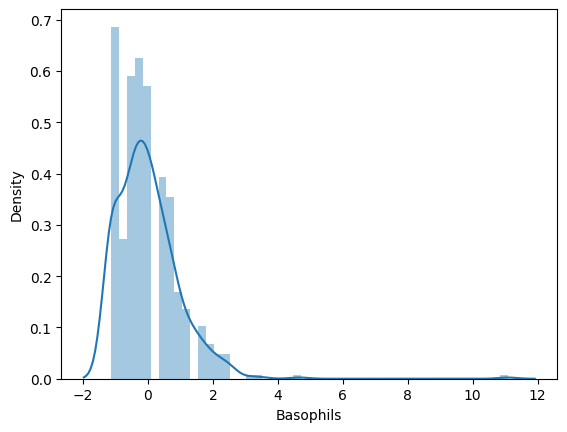

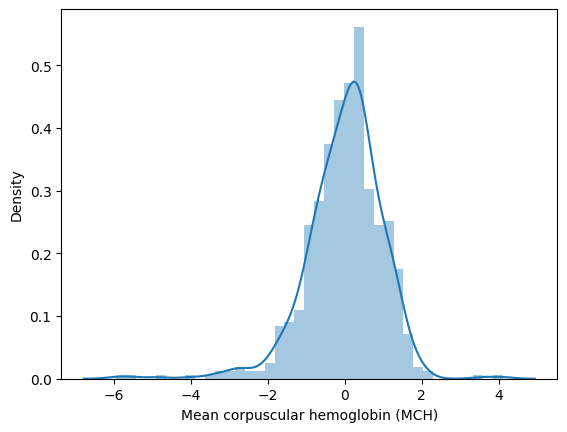

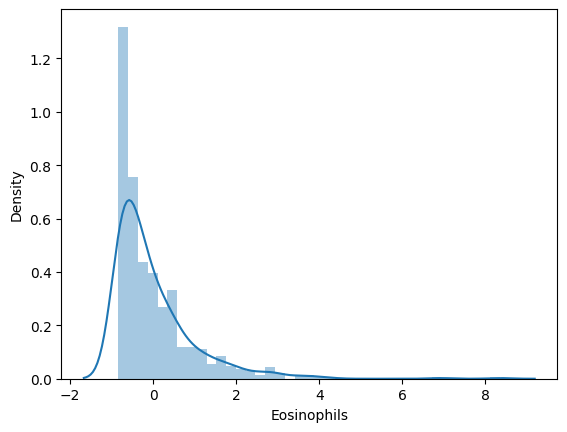

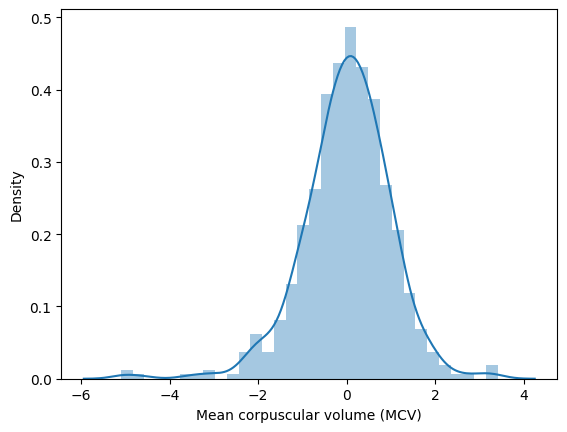

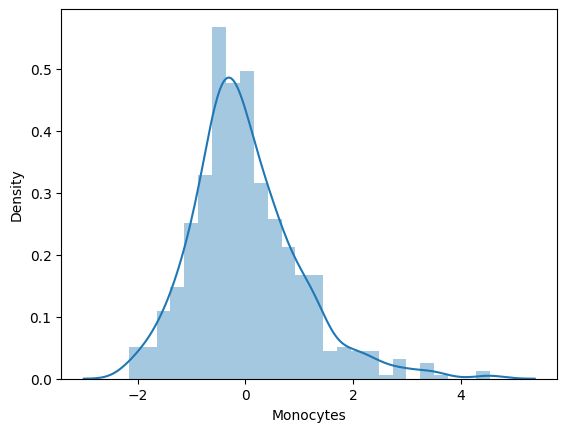

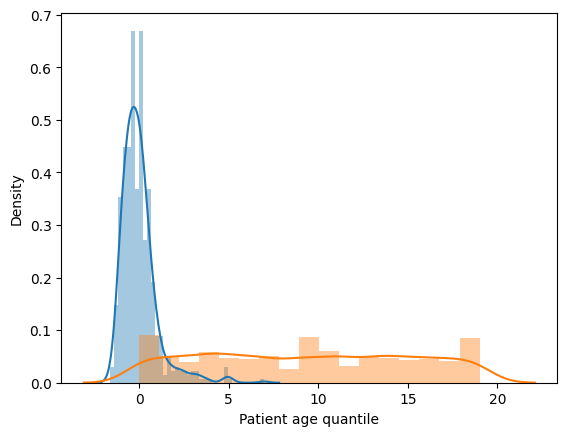

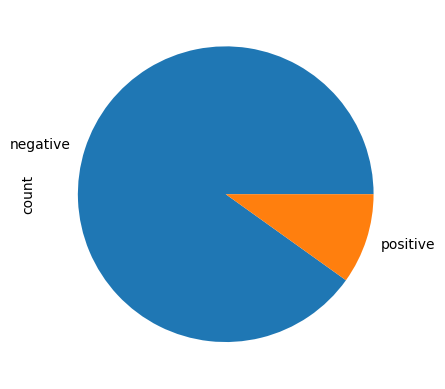

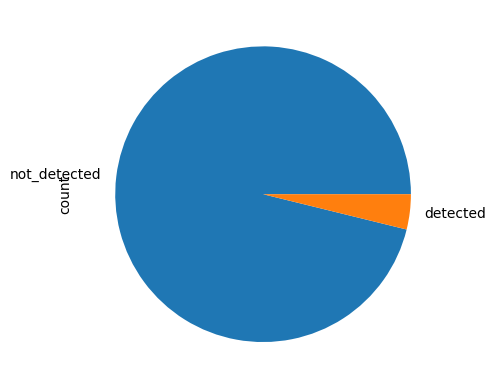

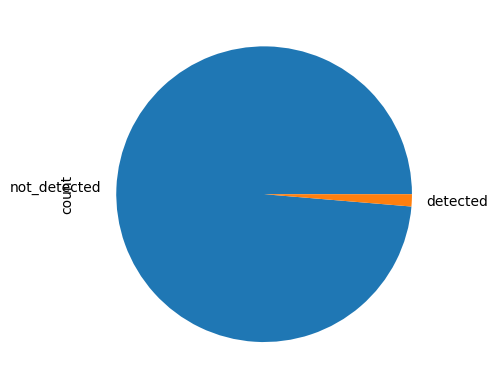

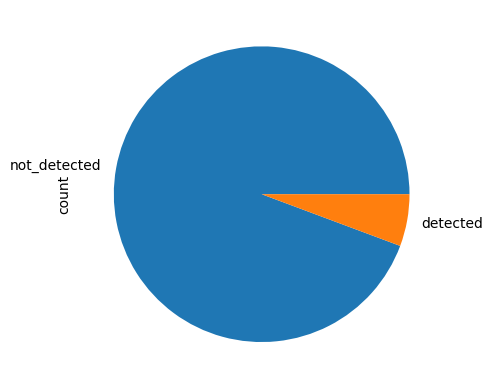

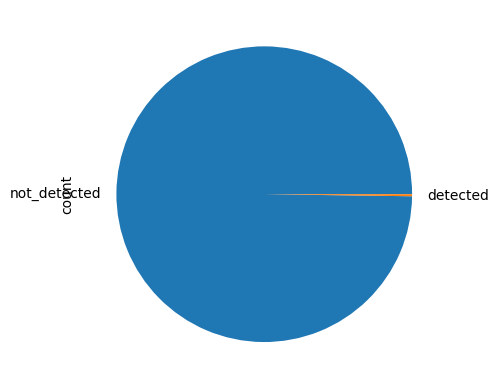

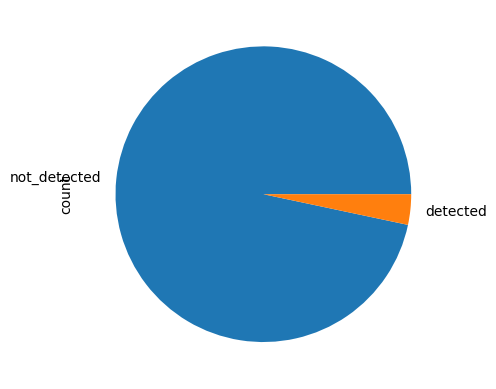

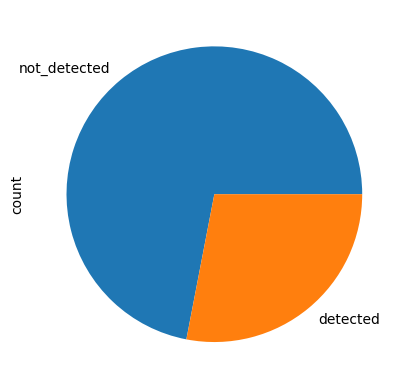

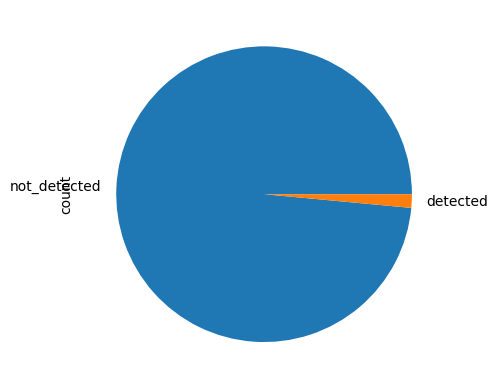

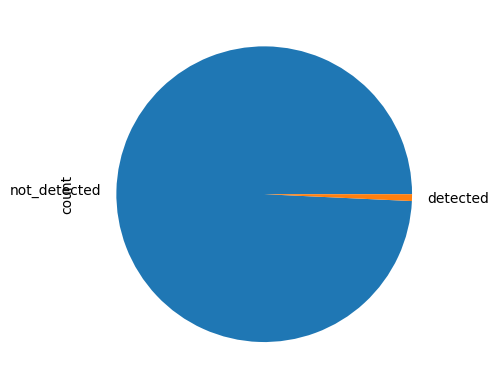

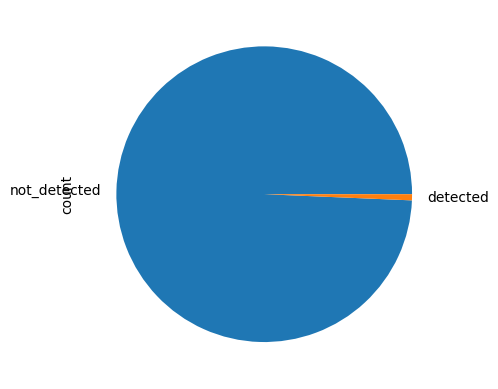

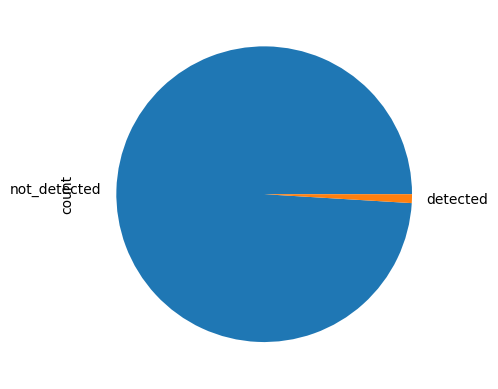

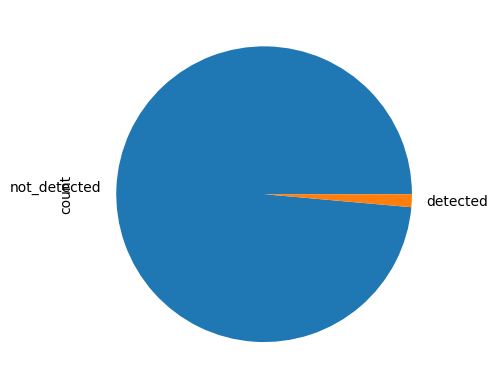

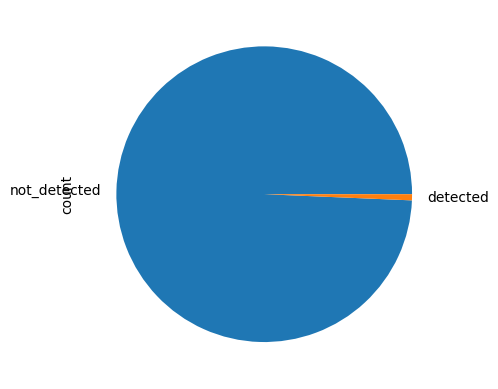

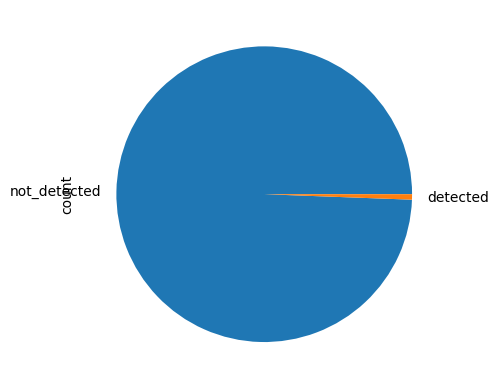

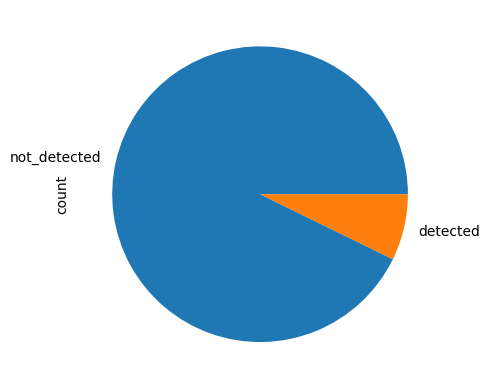

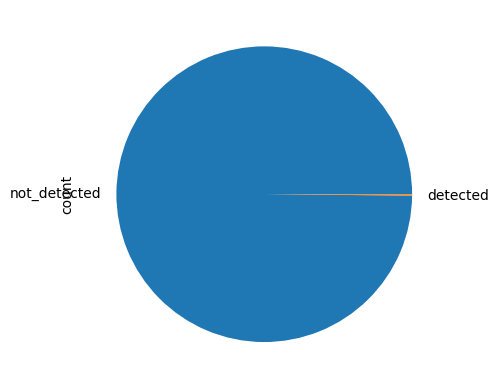

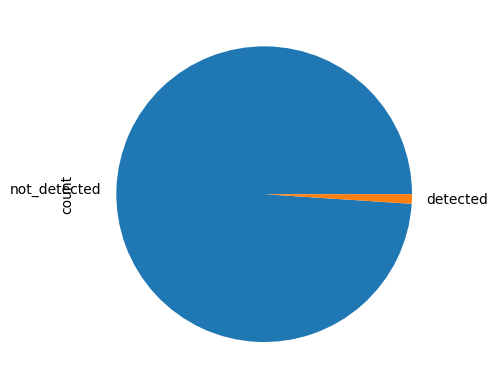

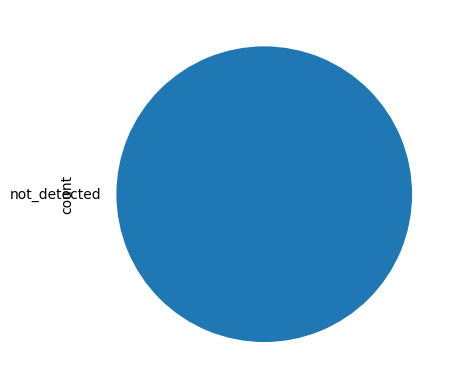

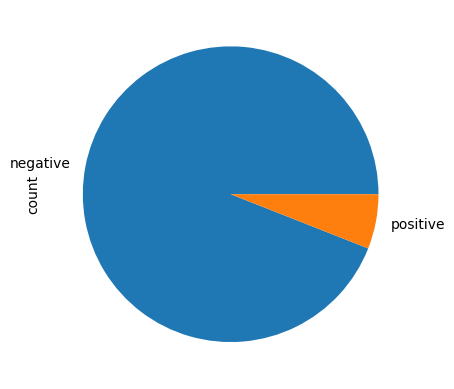

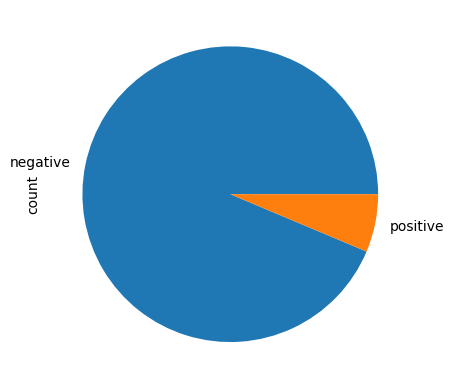

In [6]:
# data=data.drop('Patient ID',axis=1)
data['SARS-Cov-2 exam result'].value_counts(normalize=True)
for col in data.select_dtypes('float'):
    print(col)
    plt.figure()
    sns.distplot(data[col])

    
print('----------------------------------------------------------')    
    
sns.distplot(data['Patient age quantile'])

data['Patient age quantile']. value_counts()

data['SARS-Cov-2 exam result'].unique()

    
for col in data.select_dtypes('object'):
    print(col, data[col].unique())
    plt.figure()
    data[col].value_counts().plot.pie()
    print(col)

In [7]:
data['SARS-Cov-2 exam result'] == 'positive'
data[data['SARS-Cov-2 exam result'] == 'positive']
positive_df = data[data['SARS-Cov-2 exam result'] =='positive']
negative_df = data[data['SARS-Cov-2 exam result'] =='negative']
missing_rate = data.isna().sum()/data.shape[0]
# print(missing_rate)

blood_columns = data.columns[(missing_rate < 0.9) & (missing_rate >0.88)]
# print(blood_columns)
viral_columns = data.columns[(missing_rate < 0.88) & (missing_rate >0.75)]
# print(viral_columns)

/tmp/ipykernel_19/1004357029.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col],label='positive')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_19/1004357029.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for hi

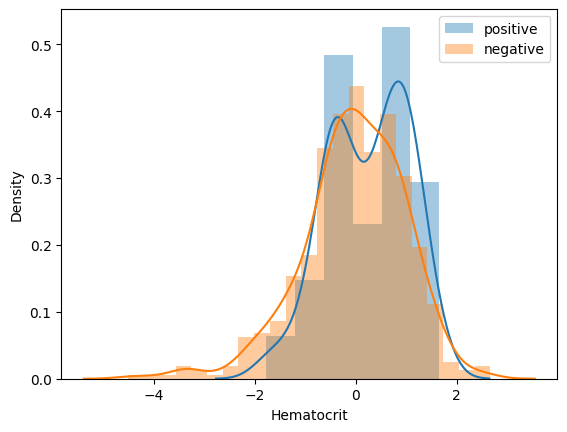

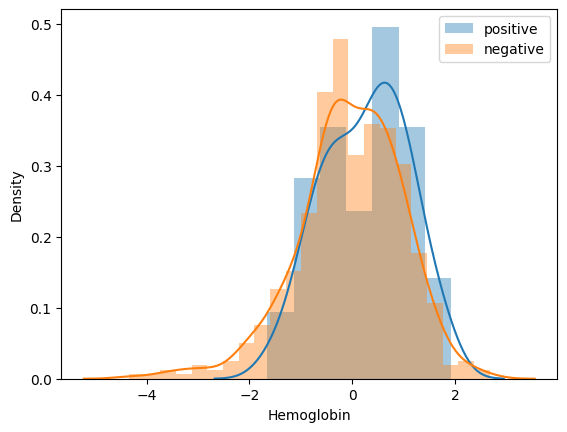

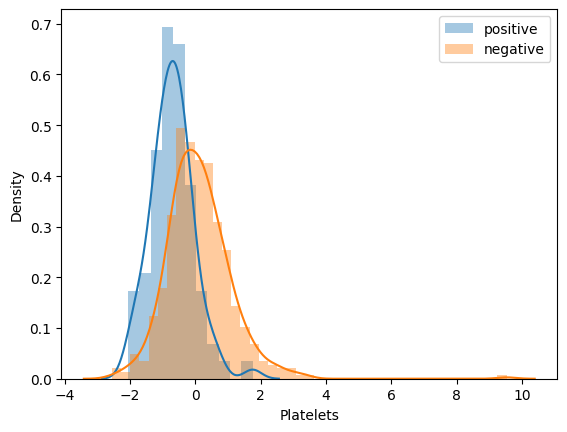

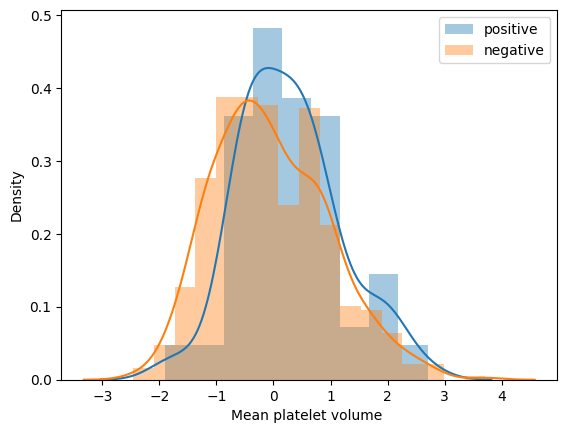

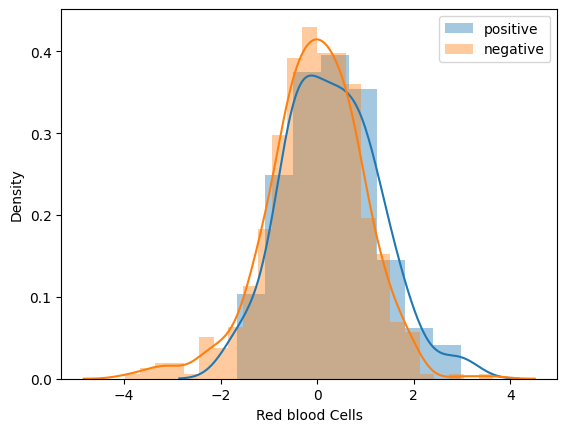

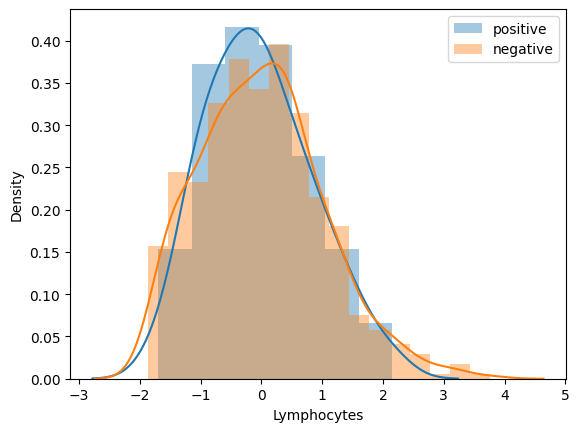

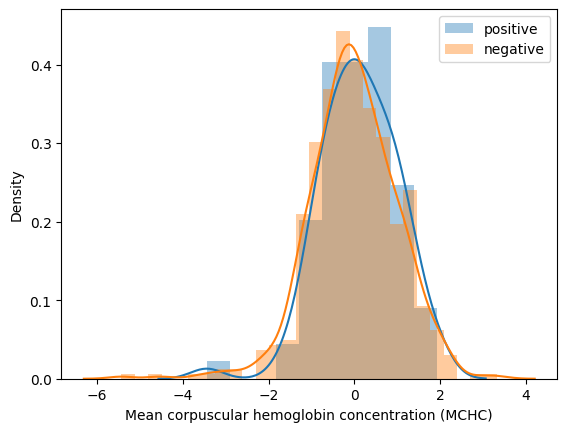

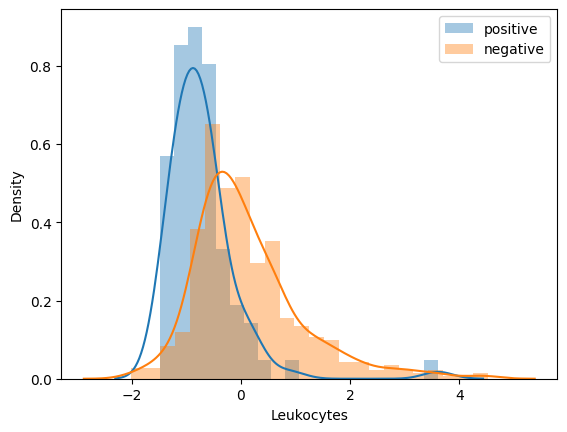

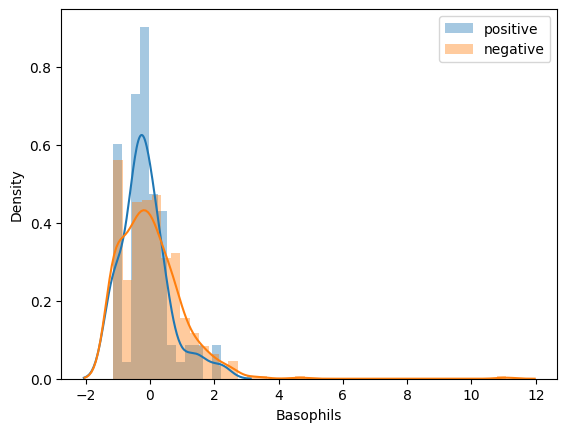

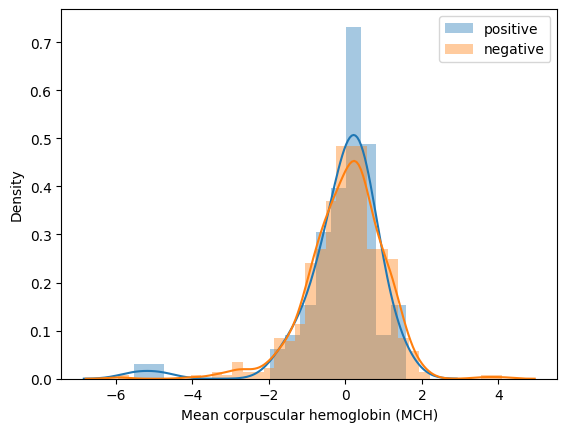

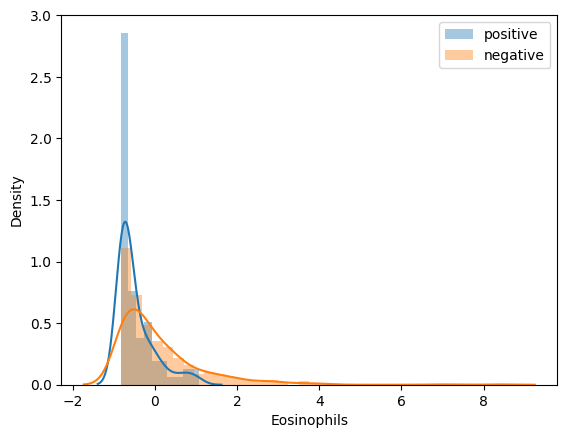

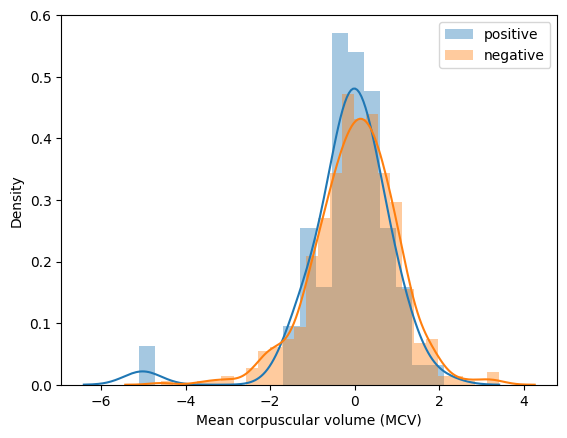

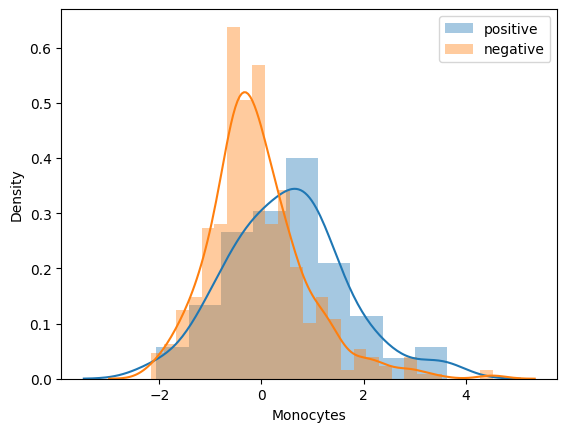

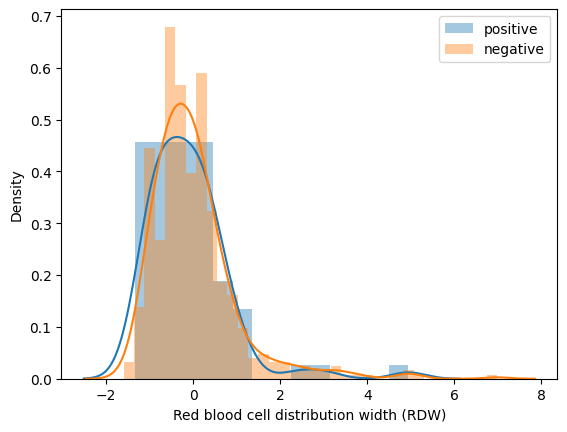

In [8]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col],label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

Influenza A,detected,not_detected
SARS-Cov-2 exam result,,
negative,18,1224
positive,0,112


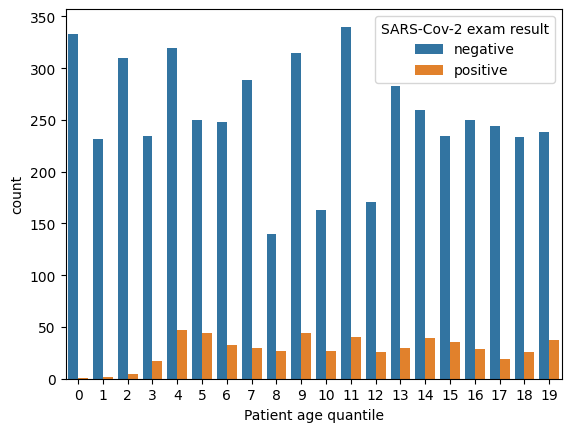

In [9]:
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=data)

pd.crosstab(data['SARS-Cov-2 exam result'], data['Influenza A'])

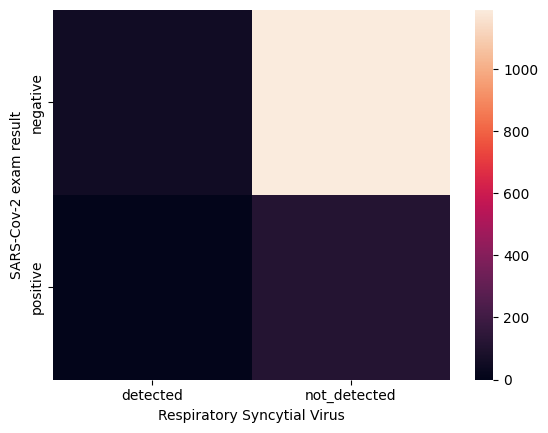

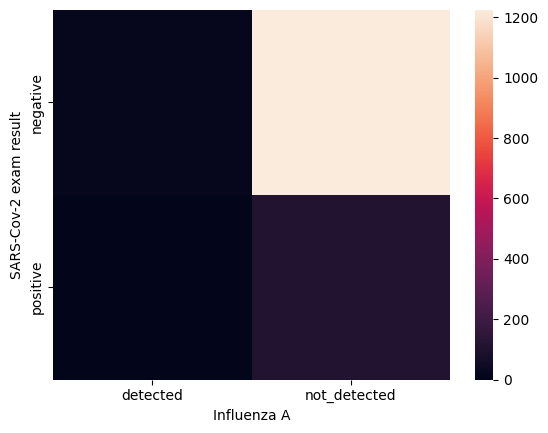

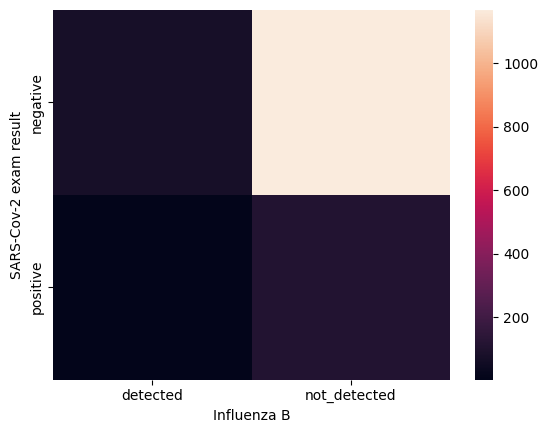

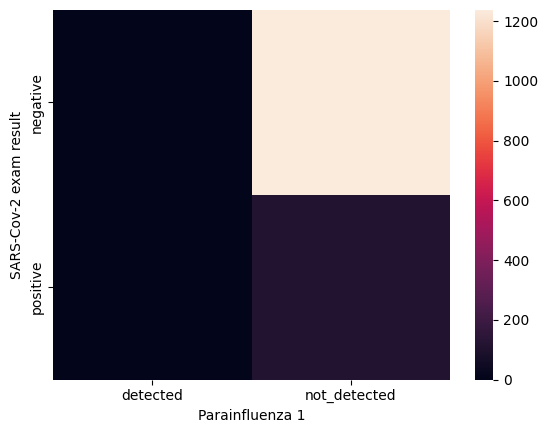

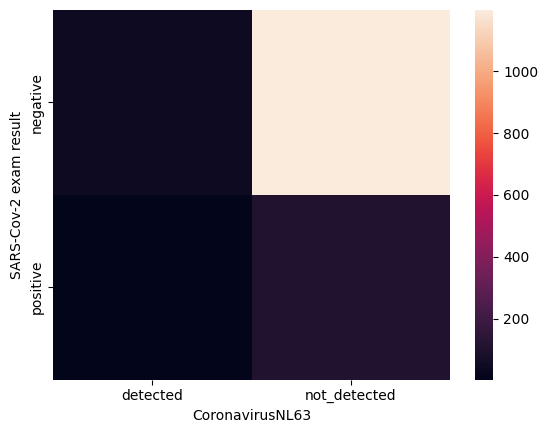

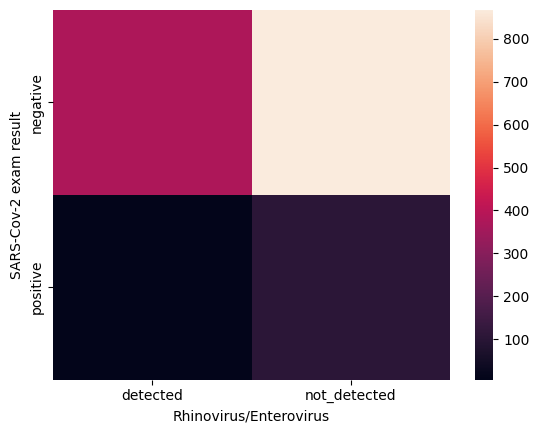

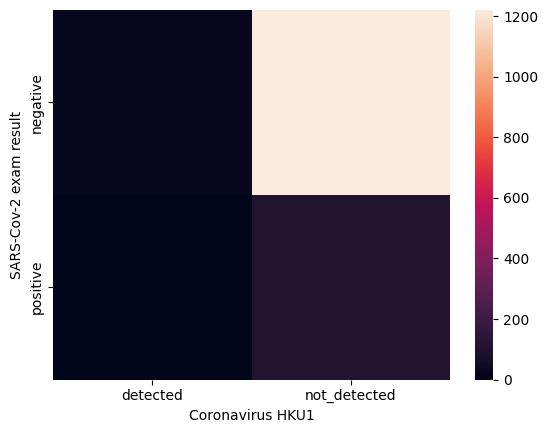

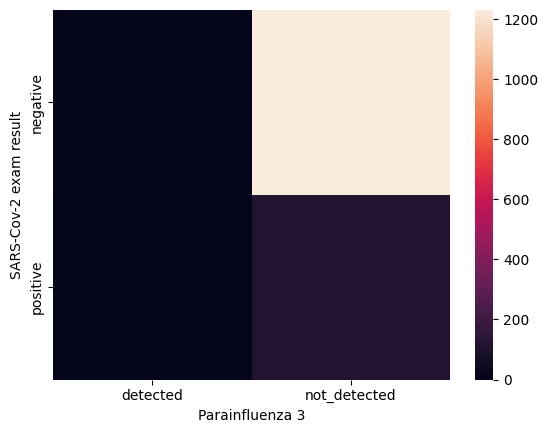

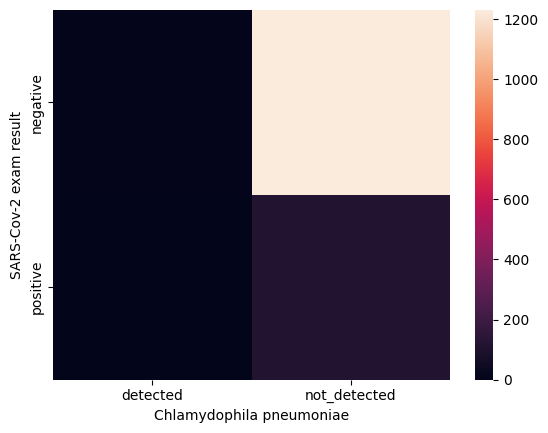

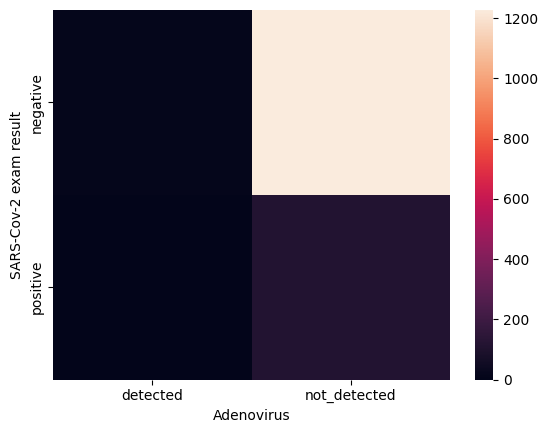

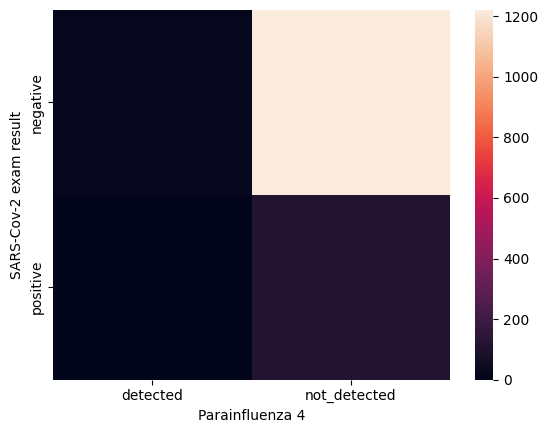

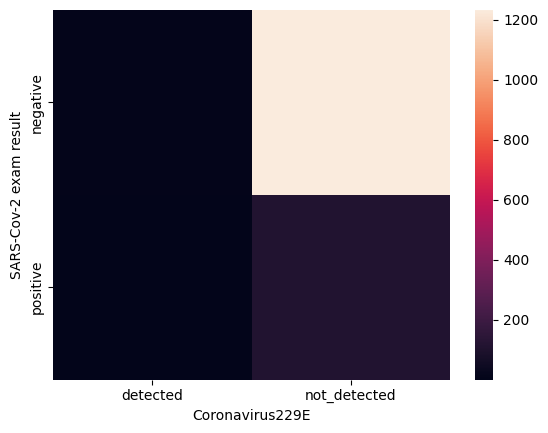

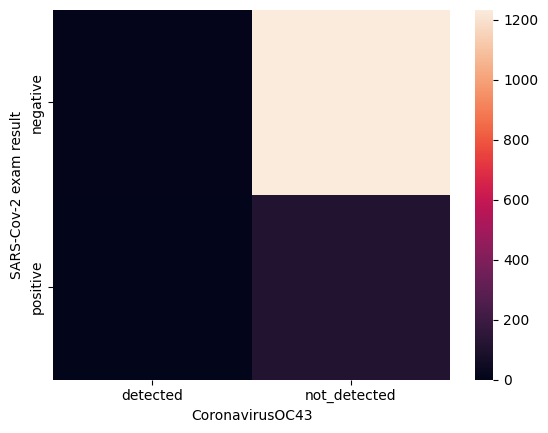

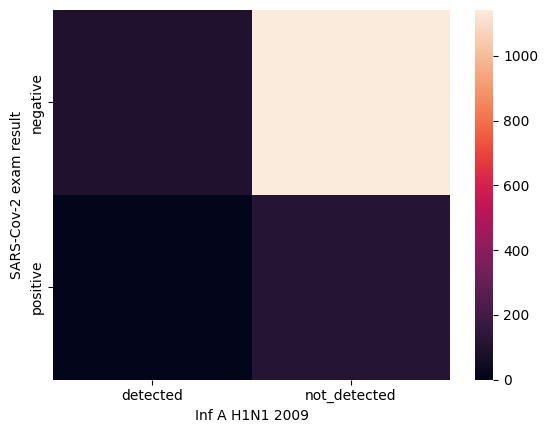

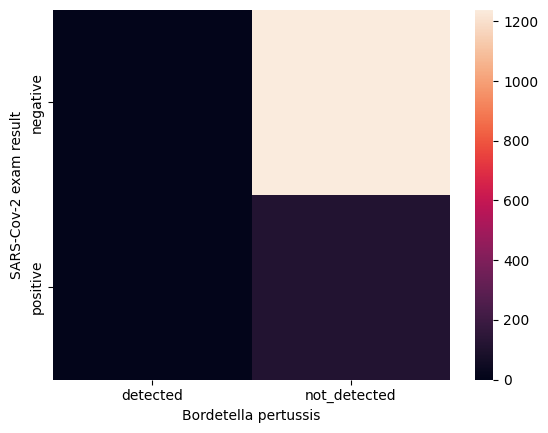

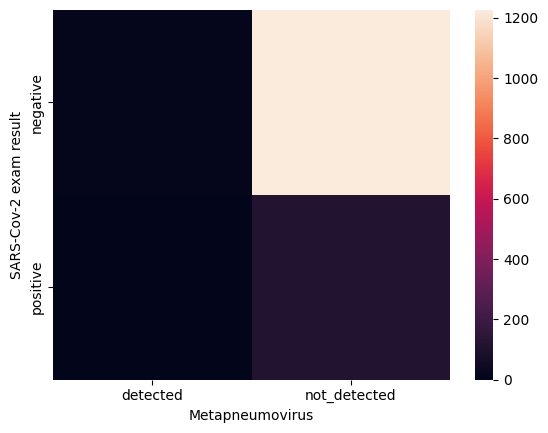

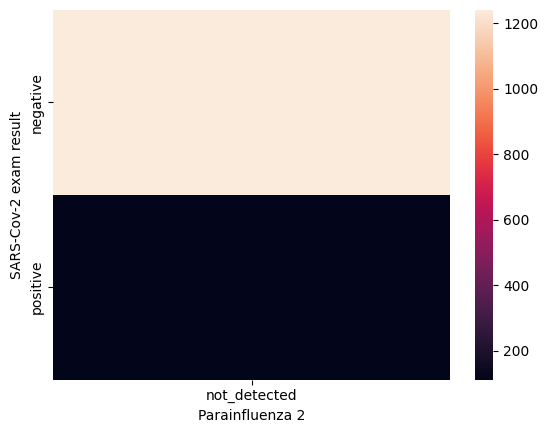

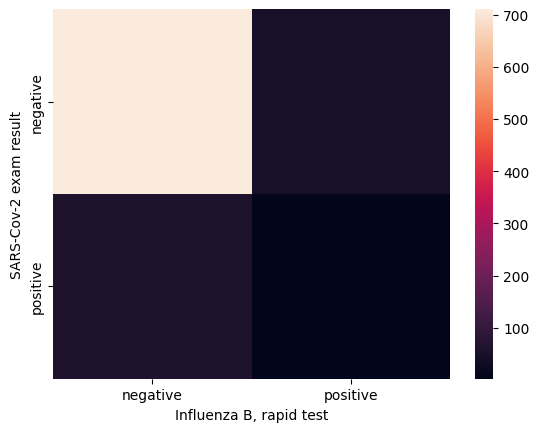

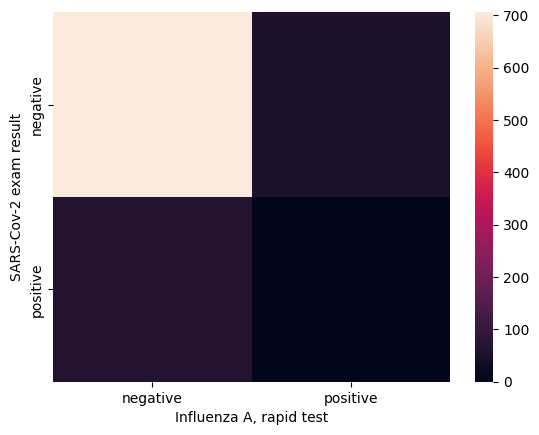

In [10]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(data['SARS-Cov-2 exam result'], data[col]))